# Imports

In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Fetch data

In [2]:
#gene_info = pd.read_csv("gene_info_some_genes.txt", sep='\t',header=0)
gene_info = pd.read_csv("gene_info_some_genes_32_Tissue-specific_regulatory_networks_FANTOM5-v1.txt", sep='\t',header=0)
len(gene_info["Gene name"])

632

In [3]:
nbr_genes=len(gene_info["Gene name"])
max_corr=pd.DataFrame(np.zeros([nbr_genes,nbr_genes]), index=gene_info["Gene name"], columns=gene_info["Gene name"])
nbr_signif_corr=pd.DataFrame(np.zeros([nbr_genes,nbr_genes]), index=gene_info["Gene name"], columns=gene_info["Gene name"])
sign_cutoff=0.1550258
gene_index=0
gene_info["Gene name"]
for gene in gene_info["Gene name"]:
    print(gene_index, end="\r")
    gene_folder=glob.glob("correlations/correlations_*_*_"+gene+"/")
    #print(gene_folder)
    if len(gene_folder) ==1 :
        sub_gene_index=0
        for sub_gene in gene_info["Gene name"]:
            sub_gene_file=glob.glob(gene_folder[0]+sub_gene+".csv.gz")
            #print(sub_gene_file)
            if len(sub_gene_file) ==1:
                if len(glob.glob(gene_folder[0]+sub_gene+".csv.gz.info"))==0 :
                    my_data = pd.read_csv(sub_gene_file[0], sep=',',header=0,index_col=0)
                    max_corr.values[gene_index,sub_gene_index]=my_data.abs().max().max()
                    nbr_signif_corr.values[gene_index,sub_gene_index]=np.sum(((my_data.abs())>sign_cutoff).values)
                    with open(sub_gene_file[0]+".info","w+") as f:
                        f.write(str(max_corr.values[gene_index,sub_gene_index])+"\n"+str(nbr_signif_corr.values[gene_index,sub_gene_index]))
                else:
                    with open(sub_gene_file[0]+".info","r") as f:
                        max_corr.values[gene_index,sub_gene_index] = float(f.readline().strip())
                        nbr_signif_corr.values[gene_index,sub_gene_index] = (f.readline().strip())
            sub_gene_index+=1
    gene_index+=1

max_corr.shape
print("Done!")

"""
for gene in sorted(glob.glob("correlations/correlations_*_*_*/")):
    break
    gene_index+=1
max_corr.shape"""

Done!


'\nfor gene in sorted(glob.glob("correlations/correlations_*_*_*/")):\n    break\n    gene_index+=1\nmax_corr.shape'

# Fetch data BIOGRID

In [4]:
biogrid_df = pd.read_csv("../data/BIOGRID-MV-Physical-3.5.171.tab2.txt", sep= "\t")[["Official Symbol Interactor A","Official Symbol Interactor B"]]
nbr_genes=len(gene_info["Gene name"])
interaction_matrix_biogrid=pd.DataFrame(np.zeros([nbr_genes,nbr_genes]), index=gene_info["Gene name"], columns=gene_info["Gene name"])
for index, row in biogrid_df.iterrows():
    #row=row.str.upper()
    #print (row["Official Symbol Interactor A"],row["Official Symbol Interactor B"])
    if gene_info["Gene name"].isin([row["Official Symbol Interactor A"]]).any() and gene_info["Gene name"].isin([row["Official Symbol Interactor B"]]).any():
        interaction_matrix_biogrid.loc[row["Official Symbol Interactor A"],row["Official Symbol Interactor B"]]=1
        interaction_matrix_biogrid.loc[row["Official Symbol Interactor B"],row["Official Symbol Interactor A"]]=1
        #print (row["Official Symbol Interactor A"],row["Official Symbol Interactor B"])


/home/antoine/mit_internship/miniconda3/envs/kipoi-DeepSEA__predict/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,2,14,15,16,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Show data

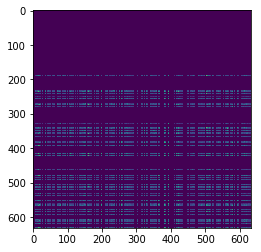

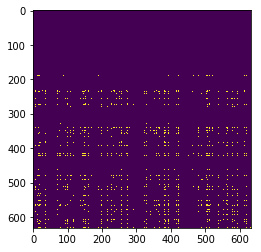

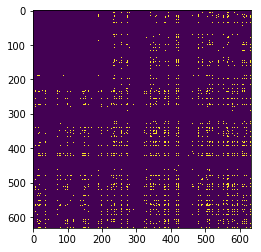

In [5]:
plt.imshow(max_corr.values)
plt.show()
plt.imshow(max_corr.values>0.3)
plt.show()
plt.imshow((max_corr.values>0.3) | np.transpose(max_corr.values>0.3))
plt.show()

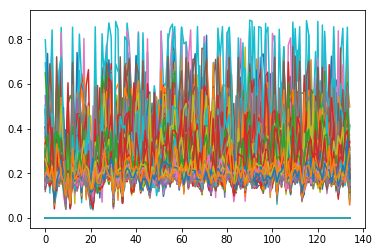

In [6]:
plt.plot(np.delete(max_corr.values,np.where(np.sum(max_corr.values!=0, axis=1)==0),axis=0))
plt.show()

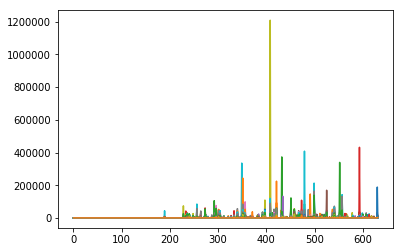

In [7]:
plt.plot(nbr_signif_corr.values)
plt.show()

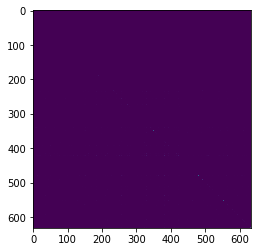

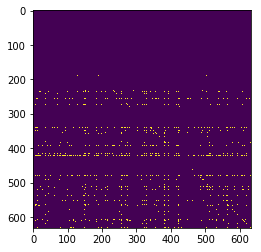

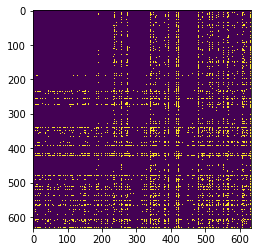

In [8]:
plt.imshow(nbr_signif_corr.values)
plt.show()
plt.imshow(nbr_signif_corr.values>3000)
plt.show()
plt.imshow((nbr_signif_corr.values>1000) | np.transpose(nbr_signif_corr.values>1000))
plt.show()

## Import and define functions

In [9]:
import networkx as nx
from matplotlib import pyplot, patches
import numpy as np

def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = pyplot.figure(figsize=(5, 5)) # in inches
    pyplot.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = pyplot.gca()
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx-0.5, current_idx-0.5),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth="1"))
            current_idx += len(module)

## Define graph for max_corr

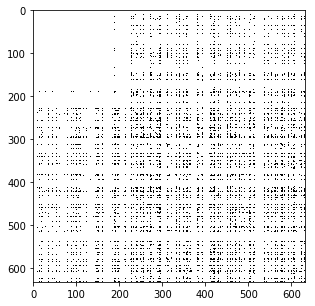

In [10]:
cutoff=0.25
G = nx.from_numpy_matrix((max_corr.values>cutoff) | np.transpose(max_corr.values>cutoff))

draw_adjacency_matrix(G)

## Define graph for nbr_signif_corr

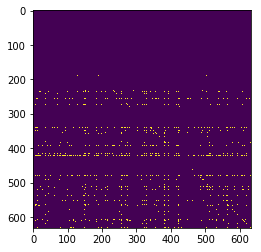

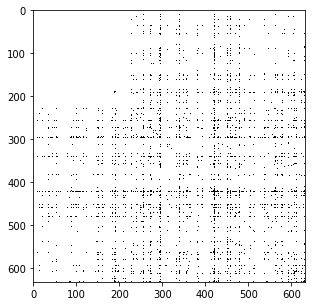

In [11]:
cutoff=3000
G = nx.from_numpy_matrix((nbr_signif_corr.values>cutoff) | np.transpose(nbr_signif_corr.values>cutoff))

plt.imshow(nbr_signif_corr.values>3000)
plt.show()

draw_adjacency_matrix(G)

## Run Louvain on whole data

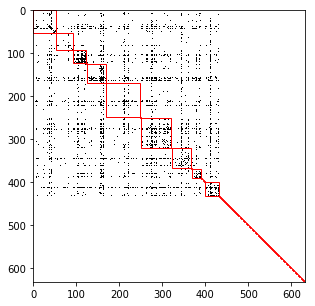

In [12]:
import numpy as np
from collections import defaultdict

import community #https://github.com/taynaud/python-louvain

# Run louvain community finding algorithm
louvain_community_dict = community.best_partition(G)

# Convert community assignmet dict into list of communities
louvain_comms = defaultdict(list)
for node_index, comm_id in louvain_community_dict.items():
    louvain_comms[comm_id].append(node_index)
louvain_comms = louvain_comms.values()

nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["red"])
louvain_comms_big=[]
for commun in louvain_comms:
    louvain_comms_big.append(list(nbr_signif_corr.columns[commun]))

In [13]:
#print(louvain_comms)
#print(nbr_signif_corr.columns)
for commun in louvain_comms:
    print(nbr_signif_corr.columns[commun])

Index(['HDX', 'ZBTB7B', 'PRDM4', 'SP100', 'ZBTB18', 'ZNF524', 'JDP2', 'FOXJ2',
       'POU2F1', 'SOX4', 'SRF', 'ZNF784', 'RUNX2', 'KLF16', 'LBX2', 'TFAP4',
       'ARNT', 'ETV2', 'PAX9', 'RARB', 'HOXB9', 'SP1', 'MZF1', 'PITX1',
       'SOX15', 'TP53', 'CTCF', 'HINFP', 'ELF3', 'POU5F1B', 'HOXB7', 'SPDEF',
       'NRL', 'CLOCK', 'NFIC', 'TEF', 'GFI1', 'IRF3', 'NR3C2', 'NFE2L2',
       'TCF12', 'HOXB6', 'ZBTB7C', 'STAT5A', 'NEUROG2', 'GZF1', 'ARID5A',
       'GABPA', 'ARID3A', 'MEF2A', 'PKNOX1', 'SOX18', 'NRL'],
      dtype='object', name='Gene name')
Index(['LHX8'], dtype='object', name='Gene name')
Index(['EBF1', 'HLF', 'TP63', 'MAFF', 'POU5F1', 'POU5F1', 'POU5F1', 'ATF7',
       'TFEB', 'ZNF384', 'E2F7', 'TFCP2', 'ZKSCAN3', 'FOXG1', 'ZSCAN16',
       'TCF7', 'ZNF589', 'GMEB1', 'FOXP3', 'RUNX3', 'ZNF740', 'PLAG1', 'THRA',
       'ZBED1', 'ITGB2', 'VSX2', 'ARNTL', 'AIRE', 'ZNF143', 'ZNF219', 'POU5F1',
       'HMX2', 'POU5F1', 'POU5F1', 'POU5F1', 'ATF4', 'OTX1', 'FOXP1', 'IRF5'],
      dt

## Delete not important data info

In [14]:
genes_to_drop=(max_corr.columns[np.sum(max_corr.values!=0, axis=1)==0])
max_corr=max_corr.drop(genes_to_drop,axis=0).drop(genes_to_drop,axis=1)

genes_to_drop=(nbr_signif_corr.columns[np.sum(nbr_signif_corr.values!=0, axis=1)==0])
nbr_signif_corr=nbr_signif_corr.drop(genes_to_drop,axis=0).drop(genes_to_drop,axis=1)

#np.delete(np.delete(max_corr.values, np.where(np.sum(max_corr.values!=0, axis=1)==0),axis=0), np.where(np.sum(max_corr.values!=0, axis=1)==0),axis=0)
#nbr_signif_corr.values

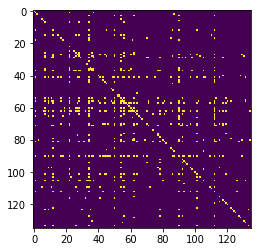

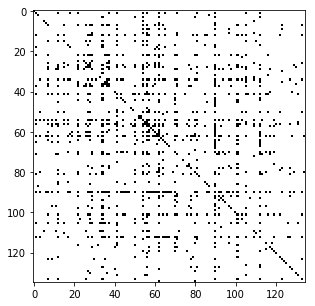

In [15]:
cutoff=11000
G = nx.from_numpy_matrix((nbr_signif_corr.values>cutoff) | np.transpose(nbr_signif_corr.values>cutoff))

plt.imshow(nbr_signif_corr.values>cutoff)
plt.show()

draw_adjacency_matrix(G)

## Run Louvain on part of data

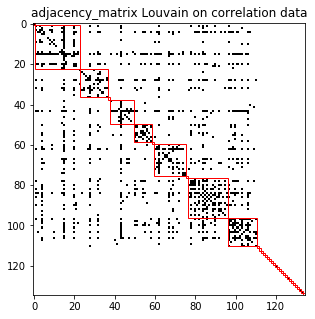

In [16]:
import numpy as np
from collections import defaultdict

import community

# Run louvain community finding algorithm
louvain_community_dict = community.best_partition(G)

# Convert community assignmet dict into list of communities
louvain_comms = defaultdict(list)
for node_index, comm_id in louvain_community_dict.items():
    louvain_comms[comm_id].append(node_index)
louvain_comms = louvain_comms.values()

nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["red"])
plt.title("adjacency_matrix Louvain on correlation data")
louvain_comms_small=[]
for commun in louvain_comms:
    louvain_comms_small.append(list(nbr_signif_corr.columns[commun]))

In [17]:
#print(louvain_comms)
#print(nbr_signif_corr.columns)
for commun in louvain_comms:
    if len(commun) != 1 :
        print(nbr_signif_corr.columns[commun])

Index(['HOXB9', 'TFCP2L1', 'STAT1', 'ARHGEF12', 'NFYA', 'VSX2', 'SOX8',
       'ZBTB6', 'BPTF', 'ZNF143', 'ONECUT2', 'NKX3-1', 'HSF4', 'ZBTB7C',
       'FOXA2', 'NFATC1', 'IKZF2', 'FOXP1', 'EWSR1', 'NR2F2', 'PAX6', 'CREB5'],
      dtype='object', name='Gene name')
Index(['NR5A1', 'ARX', 'NR1H4', 'GATA6', 'FOXO6', 'AR', 'BHLHE40', 'NR2F6',
       'NFKB2', 'MEOX1', 'PPARG', 'TBX4', 'TFAP2A', 'FOXO6'],
      dtype='object', name='Gene name')
Index(['SP1', 'ELF3', 'ERF', 'LEF1', 'PAX8', 'AIRE', 'HSF2', 'POU4F1', 'GATA3',
       'ZBTB49', 'CEBPD', 'MEF2C'],
      dtype='object', name='Gene name')
Index(['GLIS3', 'HOXB7', 'RARG', 'IRF6', 'BARX2', 'MEIS2', 'IRF5', 'SOX18',
       'BIN1'],
      dtype='object', name='Gene name')
Index(['ISL2', 'FOXJ1', 'HEY2', 'FOXD2', 'CLOCK', 'DLX1', 'DLX2', 'TEF',
       'OLIG1', 'ZEB1', 'MAFG', 'WT1', 'OTX1', 'HES7', 'ZNF713', 'RFX7'],
      dtype='object', name='Gene name')
Index(['IKZF3', 'HOXA1', 'TFAP2E', 'EMX1', 'ZNF740', 'TBX21', 'MEF2B', 'SIX1',
   

In [18]:
community.modularity(louvain_community_dict,G)

0.3223133959466139

In [19]:
#nodes_louvain_ordered

## Run Louvain on BIOGRID data

In [20]:
G = nx.from_numpy_matrix(interaction_matrix_biogrid.values)

"""plt.imshow(nbr_signif_corr.values>cutoff)
plt.show()

draw_adjacency_matrix(G)"""

'plt.imshow(nbr_signif_corr.values>cutoff)\nplt.show()\n\ndraw_adjacency_matrix(G)'

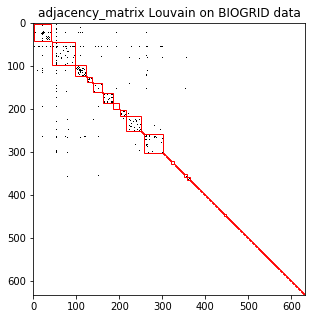

In [21]:
#genes_to_drop=(nbr_signif_corr.columns[np.sum(nbr_signif_corr.values!=0, axis=1)==0])
#interaction_matrix_biogrid=interaction_matrix_biogrid.drop(genes_to_drop,axis=0).drop(genes_to_drop,axis=1)

#G = nx.from_numpy_matrix(interaction_matrix_biogrid.values)

import numpy as np
from collections import defaultdict

import community

# Run louvain community finding algorithm
louvain_community_dict = community.best_partition(G)

# Convert community assignmet dict into list of communities
louvain_comms = defaultdict(list)
for node_index, comm_id in louvain_community_dict.items():
    louvain_comms[comm_id].append(node_index)
louvain_comms = louvain_comms.values()

nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["red"])
plt.title("adjacency_matrix Louvain on BIOGRID data")
louvain_comms_biogrid=[]
for commun in louvain_comms:
    louvain_comms_biogrid.append(list(interaction_matrix_biogrid.columns[commun]))

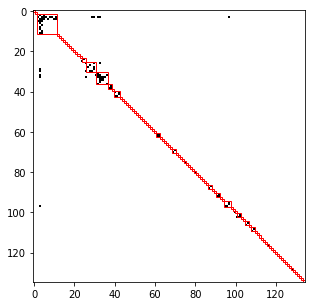

In [22]:
#genes_to_drop=(nbr_signif_corr.columns[np.sum(nbr_signif_corr.values!=0, axis=1)==0])
interaction_matrix_biogrid=interaction_matrix_biogrid.drop(genes_to_drop,axis=0).drop(genes_to_drop,axis=1)

G = nx.from_numpy_matrix(interaction_matrix_biogrid.values)

import numpy as np
from collections import defaultdict

import community

# Run louvain community finding algorithm
louvain_community_dict = community.best_partition(G)

# Convert community assignmet dict into list of communities
louvain_comms = defaultdict(list)
for node_index, comm_id in louvain_community_dict.items():
    louvain_comms[comm_id].append(node_index)
louvain_comms = louvain_comms.values()

nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["red"])
louvain_comms_biogrid=[]
for commun in louvain_comms:
    louvain_comms_biogrid.append(list(interaction_matrix_biogrid.columns[commun]))

In [23]:
g = nx.Graph()
g.add_nodes_from(list(biogrid_df["Official Symbol Interactor A"])+list(biogrid_df["Official Symbol Interactor B"]))
for indice, x in biogrid_df.iterrows():
    print(indice,end="\r")
    g.add_edge(x["Official Symbol Interactor A"],x["Official Symbol Interactor B"])

'louvain_comms_biogrid=[]\nfor commun in louvain_comms:\n    louvain_comms_biogrid.append(list(interaction_matrix_biogrid.columns[commun]))'

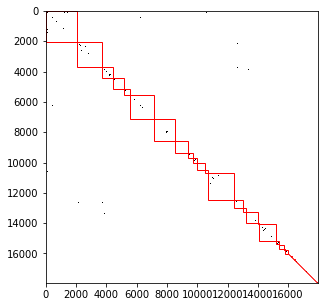

In [24]:
#genes_to_drop=(nbr_signif_corr.columns[np.sum(nbr_signif_corr.values!=0, axis=1)==0])
#interaction_matrix_biogrid=interaction_matrix_biogrid.drop(genes_to_drop,axis=0).drop(genes_to_drop,axis=1)

#G = nx.from_numpy_matrix(interaction_matrix_biogrid.values==1)
G=g
import numpy as np
from collections import defaultdict

import community

# Run louvain community finding algorithm
louvain_community_dict = community.best_partition(G)

# Convert community assignmet dict into list of communities
louvain_comms = defaultdict(list)
for node_index, comm_id in louvain_community_dict.items():
    louvain_comms[comm_id].append(node_index)
louvain_comms = louvain_comms.values()

nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["red"])
"""louvain_comms_biogrid=[]
for commun in louvain_comms:
    louvain_comms_biogrid.append(list(interaction_matrix_biogrid.columns[commun]))"""

In [38]:
#print(louvain_comms)

In [25]:
for x in range(len(louvain_comms_biogrid)): 
    if len(louvain_comms_biogrid[x])>1:
        print(x)
        print (louvain_comms_biogrid[x])
        print("")

2
['NR5A1', 'SP1', 'TP53', 'NFYA', 'GATA6', 'WT1', 'GABPA', 'GATA3', 'ZBTB49', 'TFAP2A']

15
['FOXJ1', 'RFX3']

16
['STAT1', 'LEF1', 'STAT5A', 'KLF4', 'PPARG']

17
['ELF3', 'AR', 'STAT3', 'NFKB2', 'HIC1', 'PAX6']

18
['NFE2L1', 'MAFG']

20
['HOXA1', 'NFATC1', 'IKZF2']

39
['IRF7', 'IRF7']

46
['MEF2B', 'MEF2A']

63
['HSF4', 'HSF2']

66
['BHLHE40', 'TCF3']

69
['TEAD1', 'SOX18', 'MEF2C']

73
['POU4F1', 'EWSR1']

76
['NR2F6', 'NR2F2']

78
['FOXA2', 'HOXA5']



In [26]:
from collections import Counter

for x in range(len(louvain_comms_small)): 
    if len(louvain_comms_small[x])>1:
        for y in louvain_comms_small[x]:
            for i, z in enumerate(louvain_comms_biogrid):
                if y in z:
                    print(i,end= " ")
            print(y,end= " ")
        print("\n")
        
for x in range(len(louvain_comms_small)): 
    if len(louvain_comms_small[x])>1:
        group=[]
        for y in louvain_comms_small[x]:
            for i, z in enumerate(louvain_comms_biogrid):
                if y in z:
                    group.append(i)
        c = Counter( group )
        print(c)
        #print( c.items() )
        #group.sort()
        #print(group)
        print("")

1 HOXB9 3 TFCP2L1 16 STAT1 31 ARHGEF12 2 NFYA 43 VSX2 52 SOX8 55 ZBTB6 59 BPTF 60 ZNF143 61 ONECUT2 62 NKX3-1 63 HSF4 71 ZBTB7C 78 FOXA2 20 NFATC1 20 IKZF2 84 FOXP1 73 EWSR1 76 NR2F2 17 PAX6 100 CREB5 

2 NR5A1 5 ARX 30 NR1H4 2 GATA6 50 101 FOXO6 17 AR 66 BHLHE40 76 NR2F6 17 NFKB2 87 MEOX1 16 PPARG 95 TBX4 2 TFAP2A 50 101 FOXO6 

2 SP1 17 ELF3 21 ERF 16 LEF1 37 PAX8 56 AIRE 63 HSF2 73 POU4F1 2 GATA3 2 ZBTB49 99 CEBPD 69 MEF2C 

6 GLIS3 24 HOXB7 28 RARG 32 IRF6 33 BARX2 54 MEIS2 97 IRF5 69 SOX18 103 BIN1 

8 ISL2 15 FOXJ1 38 HEY2 42 FOXD2 44 CLOCK 47 DLX1 48 DLX2 51 TEF 53 OLIG1 64 ZEB1 18 MAFG 2 WT1 82 OTX1 88 HES7 93 ZNF713 94 RFX7 

10 IKZF3 20 HOXA1 23 TFAP2E 27 EMX1 29 ZNF740 34 TBX21 46 MEF2B 49 SIX1 58 IRX6 65 NR3C2 68 HOXB6 69 TEAD1 70 HOXA3 72 MYBL2 79 GSX2 78 HOXA5 80 HOXA10 81 ATF4 83 HOXA4 92 DLX4 

11 RREB1 13 HOXC5 25 DMRT1 26 EOMES 40 FOXK1 41 75 CPEB1 45 SPIC 17 STAT3 41 75 CPEB1 85 MNT 16 KLF4 90 KLF12 17 HIC1 96 ETV7 

Counter({20: 2, 1: 1, 3: 1, 16: 1, 31: 1, 2: 1, 43

## Show network

In [32]:
print(nbr_signif_corr.columns)

Index(['LHX4', 'HOXB9', 'NR5A1', 'TFCP2L1', 'POU6F1', 'ARX', 'SP1', 'GLIS3',
       'PITX1', 'ISL2',
       ...
       'MEF2A', 'TFAP2A', 'PAX6', 'CEBPD', 'CREB5', 'SOX18', 'FOXO6', 'SOX7',
       'BIN1', 'MEF2C'],
      dtype='object', name='Gene name', length=135)


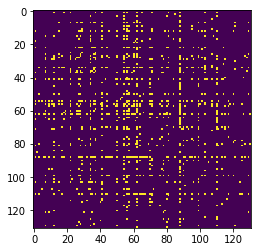

Index(['LHX4', 'HOXB9', 'NR5A1', 'TFCP2L1', 'POU6F1', 'ARX', 'SP1', 'GLIS3',
       'PITX1', 'ISL2',
       ...
       'IRF5', 'ZNF232', 'MEF2A', 'TFAP2A', 'PAX6', 'CEBPD', 'CREB5', 'SOX18',
       'BIN1', 'MEF2C'],
      dtype='object', name='Gene name', length=131)
[0, 4, 8, 10, 13, 14, 16, 20, 21, 24, 38, 39, 42, 63, 73, 83, 86, 87, 98, 102, 106, 109, 112, 119, 122, 123]


/home/antoine/mit_internship/miniconda3/envs/kipoi-DeepSEA__predict/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


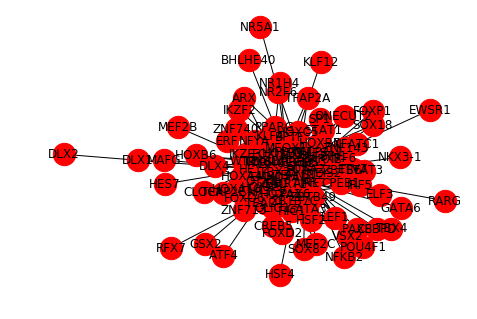

In [47]:
import matplotlib.pyplot as plt
import networkx as nx
K-mean clustering

def show_graph_with_labels(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    #edges = zip(labs[rows.tolist()], labs[cols.tolist()])
    edges = zip(gene_names[rows.tolist()], gene_names[cols.tolist()])
    #print(labs[rows.tolist()])
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, with_labels=True)
    #nx.draw(gr, node_size=500, labels=mylabels, with_labels=True)
    plt.show()

#adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool)
nbr_signif_corr=(nbr_signif_corr.loc[~nbr_signif_corr.duplicated(),~nbr_signif_corr.duplicated()])

adjacency_matrix = (nbr_signif_corr.values>cutoff) | np.transpose(nbr_signif_corr.values>cutoff)
np.fill_diagonal(adjacency_matrix,0)


#adjacency_matrix=np.delete(np.delete(adjacency_matrix,13,axis=0),13,axis=1)
plt.imshow(adjacency_matrix)
plt.show()
genes_to_drop=([np.sum(adjacency_matrix!=0, axis=1)<1])
genes_to_drop=list(np.where(genes_to_drop[0])[0])
#rm FOXA2
#genes_to_drop.append(13)
gene_names=nbr_signif_corr.columns
print(gene_names)
print(genes_to_drop)
gene_names=(gene_names.drop(gene_names[genes_to_drop]))
adjacency_matrix=np.delete(np.delete(adjacency_matrix,genes_to_drop,axis=0),genes_to_drop,axis=1)

genes_to_drop=([np.sum(adjacency_matrix!=0, axis=1)<1])
genes_to_drop=list(np.where(genes_to_drop[0])[0])
gene_names=(gene_names.drop(gene_names[genes_to_drop]))
adjacency_matrix=np.delete(np.delete(adjacency_matrix,genes_to_drop,axis=0),genes_to_drop,axis=1)


show_graph_with_labels(adjacency_matrix)

## Determine cut_off (where modularity is biggest)

In [28]:
modularity={}
for cutoff in range(1,20000):
    if cutoff%1000==0:
        print(cutoff)
    G = nx.from_numpy_matrix((nbr_signif_corr.values>cutoff) | np.transpose(nbr_signif_corr.values>cutoff))

    #draw_adjacency_matrix(G)
    # Run louvain community finding algorithm
    louvain_community_dict = community.best_partition(G)

    # Convert community assignmet dict into list of communities
    louvain_comms = defaultdict(list)
    for node_index, comm_id in louvain_community_dict.items():
        louvain_comms[comm_id].append(node_index)
    louvain_comms = louvain_comms.values()

    nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
    #draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["red"])

    modularity[cutoff]= [cutoff,community.modularity(louvain_community_dict,G)]

3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000


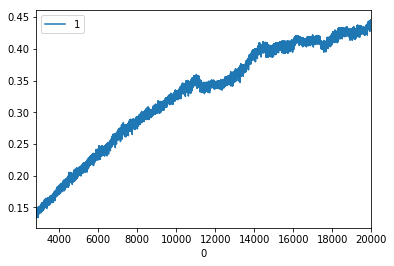

In [65]:
pd.DataFrame.from_dict(modularity).T.plot(x=0,y=1)
plt.show()

## Test consistency of graph

In [48]:
from math import log

def variation_of_information(X, Y):
  n = float(sum([len(x) for x in X]))
  sigma = 0.0
  for x in X:
    p = len(x) / n
    for y in Y:
      q = len(y) / n
      r = len(set(x) & set(y)) / n
      if r > 0.0:
        sigma += r * (log(r / p, 2) + log(r / q, 2))
  return abs(sigma)

In [49]:
"""X1 = [ ["g",2,3,4,5], [6,7,8,9,10] ]
Y1 = [ [6,7,8,9,10], [2,3,4,5] ]
print(variation_of_information(X1, Y1))
# VI = 0"""

'X1 = [ ["g",2,3,4,5], [6,7,8,9,10] ]\nY1 = [ [6,7,8,9,10], [2,3,4,5] ]\nprint(variation_of_information(X1, Y1))\n# VI = 0'

In [50]:
X4 = [ [1,3],[2,4] ]
Y4 = [ [1,2], [3,4]]
print(variation_of_information(X4, Y4))
# VI = 3.322 (maximum VI is log(N) = log(4) = 1.3862943611198906)

2.0


In [51]:
log(4)

1.3862943611198906

1.9946188275415748


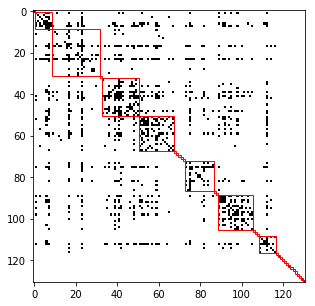

In [122]:
import random
cutoff=11000

G = nx.from_numpy_matrix((nbr_signif_corr.values>cutoff) | np.transpose(nbr_signif_corr.values>cutoff))

#plt.imshow(nbr_signif_corr.values>cutoff)
#plt.show()

#draw_adjacency_matrix(G)

# Run louvain community finding algorithm
louvain_community_dict = community.best_partition(G)

# Convert community assignmet dict into list of communities
louvain_comms = defaultdict(list)
for node_index, comm_id in louvain_community_dict.items():
    louvain_comms[comm_id].append(node_index)
louvain_comms = louvain_comms.values()

nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["red"])
louvain_comms_small_old=louvain_comms_small
louvain_comms_small=[]
for commun in louvain_comms:
    louvain_comms_small.append(list(nbr_signif_corr.columns[commun]))

print(variation_of_information(louvain_comms_small_old, louvain_comms_small))

In [57]:
log(135)

4.90527477843843

In [ ]:
print(louvain_comms_big)
print(louvain_comms_small)

In [84]:
print(variation_of_information(louvain_comms_big, louvain_comms_small))

1.3227627930552752


In [85]:
print(variation_of_information(louvain_comms_small,louvain_comms_biogrid))

3.6701684819921874


In [ ]:
log(19)

In [ ]:
louvain_comms_big_filtered=[]
for x in louvain_comms_big:
    for y in x:
        if y not in [item for sublist in louvain_comms_small for item in sublist]:
            x.remove(y)
    if len(x) > 0:
        louvain_comms_big_filtered.append(x)
print(louvain_comms_big_filtered)
print(louvain_comms_small)

In [ ]:
print(variation_of_information(louvain_comms_big_filtered, louvain_comms_small))

In [ ]:
log(19)

In [ ]:
sum(sum(nbr_signif_corr.values>3000))/(19*19)

4.679970399285404
4.90527477843843


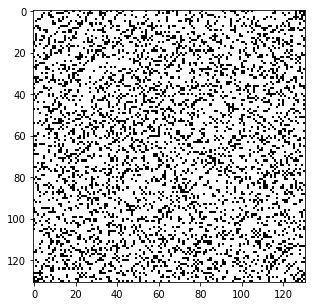

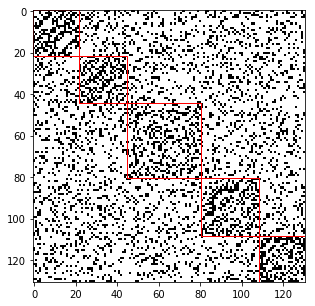

In [124]:
import random
cutoff=11000
nbr_signif_corr_noised=np.copy(nbr_signif_corr.values)
for i in range(10000):
    nbr_signif_corr_noised_old=np.copy(nbr_signif_corr_noised)
    while (nbr_signif_corr_noised_old == nbr_signif_corr_noised).all():
        x,y=random.randrange(0,len(nbr_signif_corr_noised)),random.randrange(0,len(nbr_signif_corr_noised))
        nbr_signif_corr_noised[x,y]= (cutoff+1) if (random.random()<0.13 and nbr_signif_corr_noised[x,y]<=cutoff) else 0 if (random.random()>0.13 and nbr_signif_corr_noised[x,y]>cutoff) else nbr_signif_corr_noised[x,y]


G = nx.from_numpy_matrix((nbr_signif_corr_noised>cutoff) | np.transpose(nbr_signif_corr_noised>cutoff))

#plt.imshow(nbr_signif_corr.values>cutoff)
#plt.show()

draw_adjacency_matrix(G)

# Run louvain community finding algorithm
louvain_community_dict = community.best_partition(G)

# Convert community assignmet dict into list of communities
louvain_comms = defaultdict(list)
for node_index, comm_id in louvain_community_dict.items():
    louvain_comms[comm_id].append(node_index)
louvain_comms = louvain_comms.values()

nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["red"])
louvain_comms_small=[]
for commun in louvain_comms:
    louvain_comms_small.append(list(nbr_signif_corr.columns[commun]))

print(variation_of_information(louvain_comms_small_old, louvain_comms_small))
print(log(135))